# Machine Learning Paradigms Demonstration

References:
- https://github.com/aapatel09/handson-unsupervised-learning
- https://github.com/mariahsonja/machine-learning
- https://github.com/fchollet/deep-learning-with-python-notebooks

## Supervised Learning

Supervised learning involves training a model on a labeled dataset, which means that each training example is paired with an output label.
The model learns to map inputs to outputs based on these examples.
In this example, we use the Iris dataset to classify flower species using a Random Forest classifier.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Supervised Learning - Iris Classification Accuracy:", accuracy_score(y_test, y_pred))

Supervised Learning - Iris Classification Accuracy: 1.0


## Unsupervised Learning


Unsupervised learning is used when the dataset does not have any labels. The goal is to infer the natural structure present within a set of data points.
In this example, we use KMeans clustering to group similar data points into clusters.


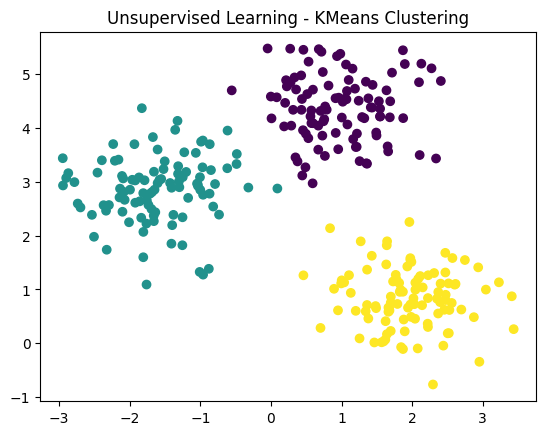

In [ ]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title("Unsupervised Learning - KMeans Clustering")
plt.show()

## Semi-Supervised Learning

Semi-supervised learning is a middle ground between supervised and unsupervised learning.
It uses a small amount of labeled data and a large amount of unlabeled data to improve learning accuracy.
In this example, we use Label Spreading on the Iris dataset, masking 70% of the labels.


In [ ]:
from sklearn.semi_supervised import LabelSpreading
import numpy as np

# Use Iris dataset again
X, y = load_iris(return_X_y=True)

# Mask most of the labels
rng = np.random.RandomState(42)
y_train = np.copy(y)
mask = rng.rand(len(y)) < 0.7
y_train[mask] = -1  # unlabeled

# Apply Label Spreading
label_prop_model = LabelSpreading(kernel='knn', n_neighbors=5)
label_prop_model.fit(X, y_train)

# Evaluate by comparing predicted labels with actual labels
y_pred = label_prop_model.transduction_
accuracy = accuracy_score(y, y_pred)
print("Semi-Supervised Learning - Label Spreading Accuracy:", accuracy)

Semi-Supervised Learning - Label Spreading Accuracy: 0.9733333333333334


## Reinforcement Learning

Reinforcement learning is about training agents to make sequences of decisions.
The agent learns to achieve a goal by interacting with an environment, receiving rewards or penalties based on its actions.
In this example, we use Q-learning to train an agent to solve the FrozenLake environment.


The code implements a simple reinforcement learning scenario using the Q-learning algorithm in a grid world environment.

Here's a breakdown of the key components:

**Environment:** A 4x4 grid representing the world where the agent can move. It contains:

- Empty spaces (0) where the agent can freely move.
- A goal (1) that the agent aims to reach.
- Obstacles (-1) that the agent must avoid.

**Agent:** An entity that learns to navigate the environment to reach the goal.

**Actions:** The agent can take four actions: up, down, left, or right.

**Q-table:** A table storing the estimated value (Q-value) of taking each action in each state. The agent uses this table to make decisions.

**Q-learning Algorithm:** The core learning process where the agent:
- Explores the environment by taking actions.
- Receives rewards for reaching the goal or penalties for hitting obstacles.
- Updates its Q-table based on these experiences to improve its decision-making.

**Epsilon-greedy Strategy:** A method to balance exploration (trying new actions) and exploitation (using known good actions). The agent explores with probability epsilon and exploits with probability 1 - epsilon.

**Outcome**

The primary outcome of running this code is a learned Q-table. This table represents the agent's knowledge about the environment, indicating the best action to take in each state to maximize its chances of reaching the goal.

After training (running the Q-learning algorithm for a sufficient number of episodes), the Q-table will contain values that guide the agent towards the goal while avoiding obstacles. You can observe the learned Q-table printed at the end of the code.

In [ ]:
import numpy as np

# Define the environment (a simple grid world)
# 0: Empty space, 1: Goal, -1: Obstacle
environment = np.array([
    [0, 0, 0, 1],
    [0, -1, 0, -1],
    [0, 0, 0, 0],
    [0, -1, 0, 0]
])

# Define possible actions (0: Up, 1: Down, 2: Left, 3: Right)
actions = [0, 1, 2, 3]

# Initialize the Q-table (state-action values)
Q = np.zeros((environment.shape[0] * environment.shape[1], len(actions)))
print(Q)
# Hyperparameters
learning_rate = 0.8
discount_factor = 0.9
exploration_rate = 0.1



[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Function to convert 2D coordinates to a state index
def get_state_index(row, col):
    return row * environment.shape[1] + col

# Function to get the next state and reward given current state and action
def get_next_state_and_reward(state_index, action):
    row = state_index // environment.shape[1]
    col = state_index % environment.shape[1]

    if action == 0:  # Up
        next_row = max(0, row - 1)
        next_col = col
    elif action == 1:  # Down
        next_row = min(environment.shape[0] - 1, row + 1)
        next_col = col
    elif action == 2:  # Left
        next_row = row
        next_col = max(0, col - 1)
    elif action == 3:  # Right
        next_row = row
        next_col = min(environment.shape[1] - 1, col + 1)

    next_state_index = get_state_index(next_row, next_col)

    # Check for obstacles or goal
    if environment[next_row, next_col] == -1:  # Obstacle
        reward = -1
        next_state_index = state_index  # Stay in current state
    elif environment[next_row, next_col] == 1:  # Goal
        reward = 1
    else:
        reward = 0

    return next_state_index, reward



In [ ]:
# Q-learning algorithm
for episode in range(1000):
    state_index = get_state_index(0, 0)  # Start at (0, 0)
    while environment[state_index // environment.shape[1], state_index % environment.shape[1]] != 1:  # While not at the goal
        # Choose action (epsilon-greedy)
        if np.random.rand() < exploration_rate:
            action = np.random.choice(actions)
        else:
            action = np.argmax(Q[state_index])

        # Get next state and reward
        next_state_index, reward = get_next_state_and_reward(state_index, action)

        # Update Q-table
        Q[state_index, action] = Q[state_index, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state_index]) - Q[state_index, action])

        # Move to the next state
        state_index = next_state_index



In [ ]:
print("Actions: ", actions, "Meaning: (0: Up, 1: Down, 2: Left, 3: Right)")
arr = np.arange(16)
# Reshape the array to 4x4
arr = arr.reshape((4, 4))

print("Environment: \n", environment, "\nCell numbers: \n", arr)

Actions:  [0, 1, 2, 3] Meaning: (0: Up, 1: Down, 2: Left, 3: Right)
Environment: 
 [[ 0  0  0  1]
 [ 0 -1  0 -1]
 [ 0  0  0  0]
 [ 0 -1  0  0]] 
Cell numbers: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
# Print the learned Q-table
print("Learned Q-table:")
print(Q)

Learned Q-table:
[[ 0.729      0.6561     0.729      0.81     ]
 [ 0.81      -0.19       0.729      0.9      ]
 [ 0.9        0.81       0.81       1.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.729      0.3779136  0.629856  -0.3411488]
 [ 0.         0.         0.         0.       ]
 [ 0.9        0.        -0.152     -0.152    ]
 [ 0.         0.         0.         0.       ]
 [ 0.629856   0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.648      0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]]


**Understanding the Q-table Structure**

- Rows: Each row in the Q-table represents a state in the environment. In this case, there are 16 states (4 rows x 4 columns in the grid).
- Columns: Each column represents a possible action the agent can take. Here, there are 4 actions: up (0), down (1), left (2), and right (3).
- Values: The values within the Q-table are called Q-values. They represent the estimated value of taking a particular action in a specific state. Higher Q-values indicate better actions for that state.

**Interpreting the Values**

**1. Finding the best action for a state:** To determine the best action for a
given state, look at the row corresponding to that state in the Q-table. The column with the highest Q-value represents the action the agent is most likely to take in that state.

**2. Understanding the values:** The actual Q-values are not as important as their relative magnitudes. A higher Q-value for an action suggests that it is more likely to lead to the goal and maximize the agent's rewards.

**3. Example:** Let's say you want to know the best action for state 5 (row 5 in the Q-table). If the Q-values in that row are:

- Up (0): 0.2
- Down (1): 0.5
- Left (2): 0.1
- Right (3): 0.3
Then the best action for state 5 is 'Down' (1) because it has the highest Q-value (0.5).

**Negative values:** Negative Q-values indicate actions that are likely to lead to penalties or undesirable outcomes (like hitting an obstacle).

**Zero values:** Zero values usually mean the agent has not explored that state-action pair enough to learn anything about it.

**Practical Interpretation**

The Q-table essentially represents the agent's learned policy. It guides the agent's actions in the environment:

1. The agent starts in a state.
2. It looks up the corresponding row in the Q-table.
3. It selects the action with the highest Q-value.
4. It takes that action, observes the reward and the next state.
5. It updates the Q-table based on this experience.
6. The process repeats until the agent reaches the goal.